# Biostat Homework 1 
Joseph Cristiano

In [1]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('/home/jcristia/Documents/ELEG815/HW2/liverdisease.csv')

Question 1: structure of the data set, including length, data type, names, and the components of the data set.

In [2]:
# Display the structure of the dataset
print("Length of the dataset:", len(df))
print("\nData types of each column:\n", df.dtypes)
print("\nColumn names:\n", df.columns)
print("\nSummary of the dataset:\n", df.info())
print("\nFirst few rows of the dataset:\n", df.head())

Length of the dataset: 583

Data types of each column:
 Age            int64
Sex           object
Tot_Bil      float64
Dir_Bil      float64
Alkphos        int64
Alamine        int64
Aspartate      int64
Tot_Prot     float64
Albumin      float64
A_G_Ratio    float64
Disease        int64
dtype: object

Column names:
 Index(['Age', 'Sex', 'Tot_Bil', 'Dir_Bil', 'Alkphos', 'Alamine', 'Aspartate',
       'Tot_Prot', 'Albumin', 'A_G_Ratio', 'Disease'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Sex        583 non-null    object 
 2   Tot_Bil    583 non-null    float64
 3   Dir_Bil    583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Alamine    583 non-null    int64  
 6   Aspartate  583 non-null    int64  
 7   Tot_Prot   583 non-null    float64
 8   Albumin    583 non

In [3]:
!pip install seaborn stemgraphic dask[dataframe]

Question 2: For variable of Age: figures of Stem-and-leaf Plot, Histogram, and Box-Plot.

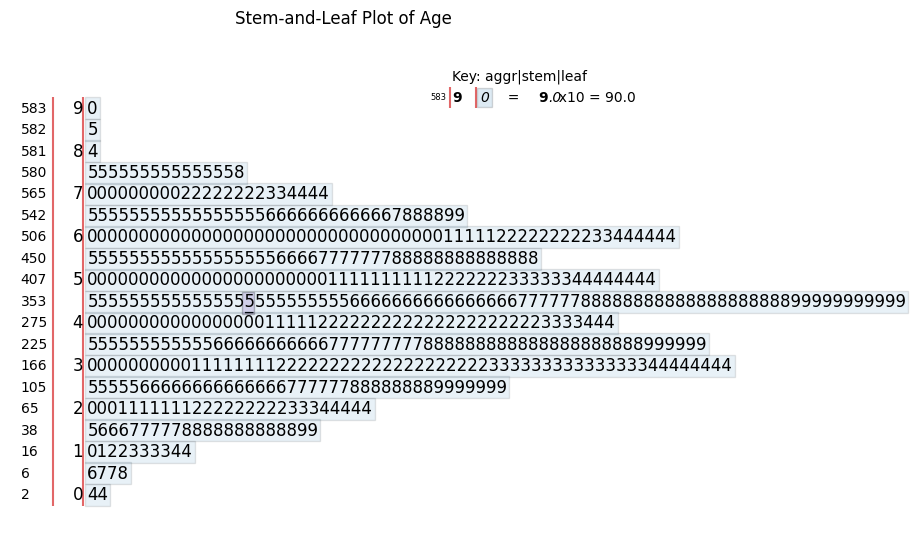

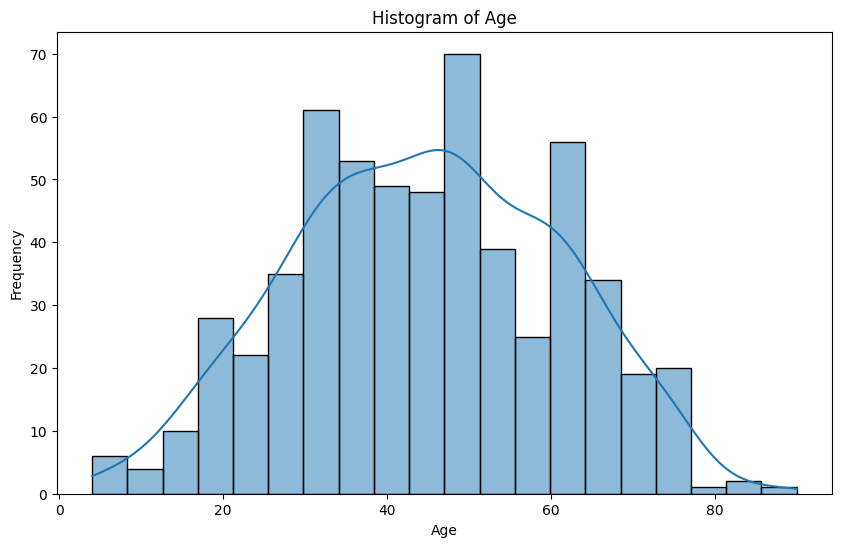

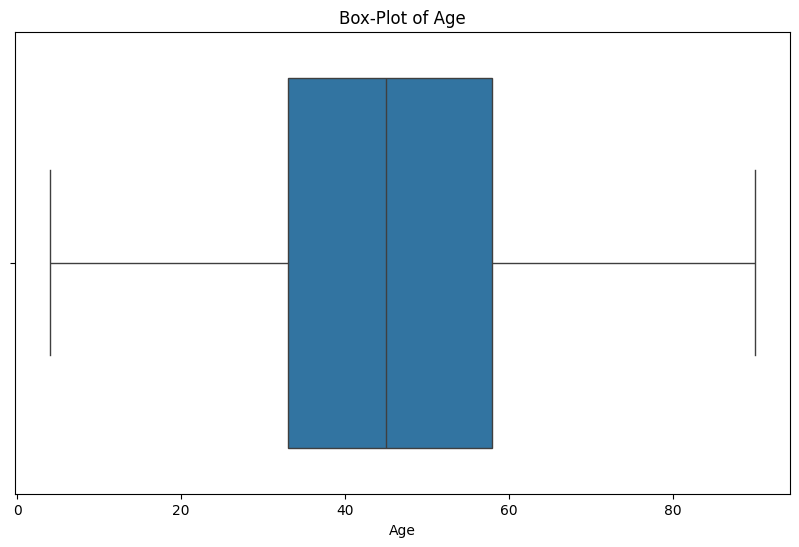

In [4]:
import seaborn as sns
import stemgraphic

import matplotlib.pyplot as plt

# Stem-and-leaf plot
stemgraphic.stem_graphic(df['Age'])
plt.title('Stem-and-Leaf Plot of Age')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box-Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Box-Plot of Age')
plt.xlabel('Age')
plt.show()

Question 3: For continuous variables, Mean, Median, Mode, Variance, Standard deviation, Standard error, coefficient of variation, Minimum, Q1, Median, Q3, Maximum, and IQR.

In [8]:
import numpy as np
from scipy import stats

# Continuous variables
continuous_vars = ['Age', 
                   'Tot_Bil', 
                   'Dir_Bil', 
                   'Alkphos', 
                   'Alamine', 
                   'Aspartate', 
                   'Tot_Prot', 
                   'Albumin', 
                   'A_G_Ratio']

# Function to calculate statistics
def calculate_statistics(df, column_names):
    stats_df = pd.DataFrame(columns=['Variable',
                                      'Mean', 
                                      'Median', 
                                      'Mode', 
                                      'Variance', 
                                      'Std_Dev', 
                                      'Std_Error', 
                                      'Coeff_of_Var', 
                                      'Min',
                                      'Q1',
                                      'Q3',
                                      'Max',
                                      'IQR'])
    
    for col in column_names:
        data = df[col].dropna()
        mean = data.mean()
        median = data.median()
        mode = data.mode()[0] if not data.mode().empty else np.nan
        variance = data.var()
        std_dev = data.std()
        std_error = stats.sem(data)
        coeff_of_var = std_dev / mean if mean != 0 else np.nan
        min_val = data.min()
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        max_val = data.max()
        iqr = q3 - q1
        
        new_row = pd.DataFrame([{
            'Variable': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Variance': variance,
            'Std_Dev': std_dev,
            'Std_Error': std_error,
            'Coeff_of_Var': coeff_of_var,
            'Min': min_val,
            'Q1': q1,
            'Q3': q3,
            'Max': max_val,
            'IQR': iqr
        }])
        
        stats_df = pd.concat([stats_df, new_row], ignore_index=True)
    
    return stats_df

# Calculate statistics
statistics_df = calculate_statistics(df, continuous_vars)
print(statistics_df)

    Variable        Mean  Median Mode      Variance     Std_Dev  Std_Error  \
0        Age   44.746141   45.00   60    262.110702   16.189833   0.670514   
1    Tot_Bil    3.298799    1.00  0.8     38.558160    6.209522   0.257172   
2    Dir_Bil    1.486106    0.30  0.2      7.887659    2.808498   0.116316   
3    Alkphos  290.576329  208.00  198  59018.866587  242.937989  10.061463   
4    Alamine   80.713551   35.00   25  33350.194438  182.620356   7.563362   
5  Aspartate  109.910806   42.00   23  83473.916429  288.918529  11.965783   
6   Tot_Prot    6.483190    6.60  7.0      1.178205    1.085451   0.044955   
7    Albumin    3.141852    3.10  3.0      0.632850    0.795519   0.032947   
8  A_G_Ratio    0.947064    0.93  1.0      0.102139    0.319592   0.013282   

   Coeff_of_Var  Min     Q1     Q3   Max    IQR  
0      0.361815    4   33.0   58.0    90   25.0  
1      1.882358  0.4    0.8    2.6  75.0    1.8  
2      1.889836  0.1    0.2    1.3  19.7    1.1  
3      0.836056   6

/tmp/ipykernel_13351/638108117.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_row], ignore_index=True)


Question 4: Frequency tables for categorical variables.

In [9]:
# Categorical variables
categorical_vars = ['Sex', 'Disease']

# Function to generate frequency tables
def generate_frequency_tables(df, column_names):
    freq_tables = {}
    for col in column_names:
        freq_tables[col] = df[col].value_counts().reset_index().rename(columns={'index': col, col: 'Frequency'})
    return freq_tables

# Generate frequency tables
frequency_tables = generate_frequency_tables(df, categorical_vars)

# Display frequency tables
for var, table in frequency_tables.items():
    print(f"Frequency table for {var}:\n", table, "\n")

Frequency table for Sex:
   Frequency  count
0         M    441
1         F    142 

Frequency table for Disease:
    Frequency  count
0          1    416
1          0    167 



Question 5: Plots of summary statistics ( histograms and bar-plot) for one continuous variable and categorical variable respectively.

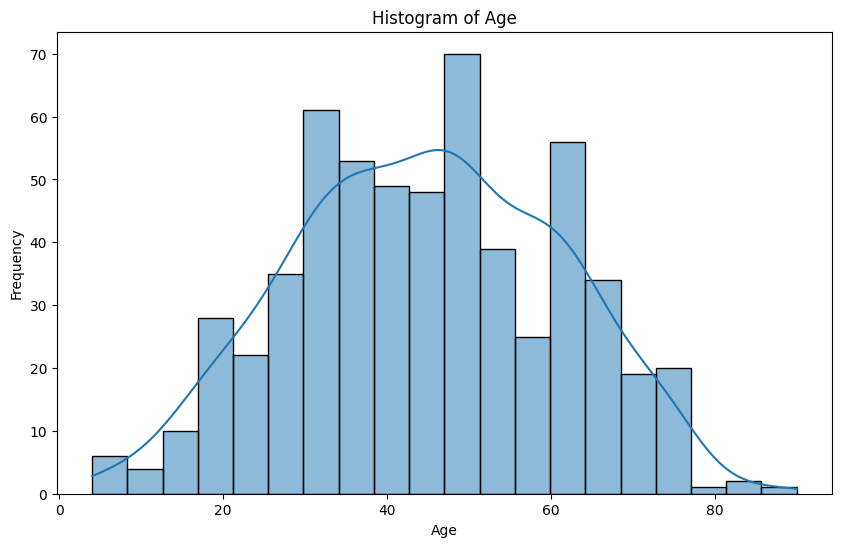

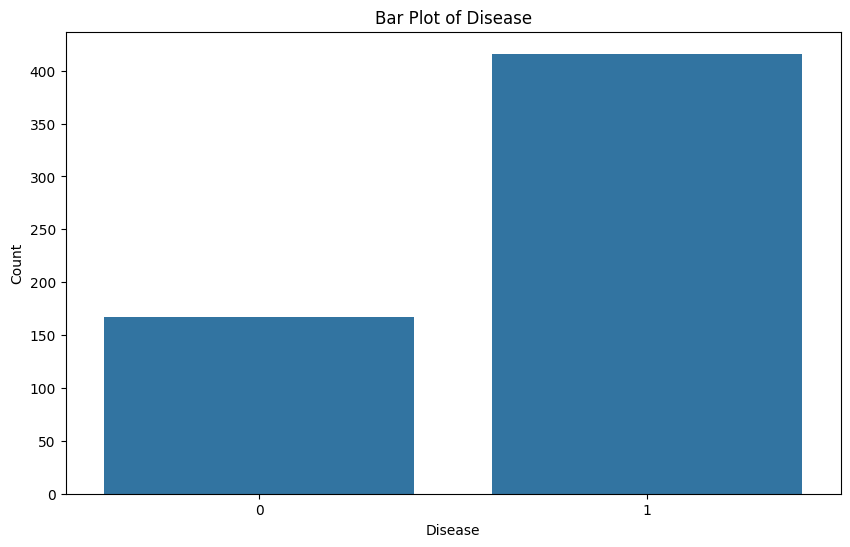

In [10]:
# Plotting histogram for a continuous variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting bar plot for a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease', data=df)
plt.title('Bar Plot of Disease')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

Question 6: A scatterplot of two continuous variables.

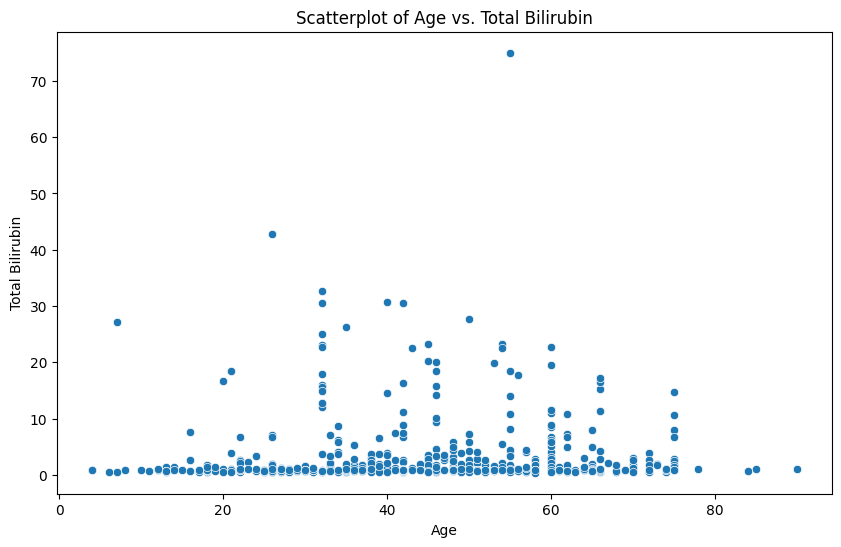

In [11]:
# Scatterplot of Age vs. Total Bilirubin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Tot_Bil', data=df)
plt.title('Scatterplot of Age vs. Total Bilirubin')
plt.xlabel('Age')
plt.ylabel('Total Bilirubin')
plt.show()